<a href="https://colab.research.google.com/github/vangarimahantesh/Data-analysis-python/blob/main/2203a51195.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
num_rows = 1000
order_ids = range(1, num_rows + 1)
delivery_times = np.random.randint(15, 61, num_rows)
order_amounts = np.random.uniform(10.0, 100.0, num_rows)
customer_ratings = np.random.randint(1, 6, num_rows)
restaurant_types = np.random.choice(['Italian', 'Mexican', 'Indian', 'Chinese', 'Pizza'], num_rows)
end_date = datetime.now()
start_date = end_date - timedelta(days=90)
order_dates = [start_date + timedelta(days=np.random.randint(0, 91)) for _ in range(num_rows)]
data = {
    'order_id': order_ids,
    'delivery_time_min': delivery_times,
    'order_amount': order_amounts,
    'customer_rating': customer_ratings,
    'restaurant_type': restaurant_types,
    'order_date': order_dates
}
df = pd.DataFrame(data)

In [6]:
df.to_csv('online_food_delivery_metrics.csv', index=False)

In [7]:
df = pd.read_csv('online_food_delivery_metrics.csv')
display(df.head())

,order_id,delivery_time_min,order_amount,customer_rating,restaurant_type,order_date
0,1,15,26.354809,2,Mexican,2025-08-07 05:13:30.622695
1,2,43,48.388463,1,Mexican,2025-09-09 05:13:30.622695
2,3,38,25.729415,5,Chinese,2025-08-15 05:13:30.622695
3,4,15,83.381800,4,Mexican,2025-08-22 05:13:30.622695
4,5,38,59.129389,4,Italian,2025-09-13 05:13:30.622695


In [8]:
import scipy.stats as stats
print("Descriptive Statistics:")
display(df.describe())
print("\nMode of 'restaurant_type':")
display(df['restaurant_type'].mode())
print("\nSkewness of 'delivery_time_min':")
display(stats.skew(df['delivery_time_min']))
print("\nKurtosis of 'order_amount':")
display(stats.kurtosis(df['order_amount']))

Descriptive Statistics:


,order_id,delivery_time_min,order_amount,customer_rating
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,37.754000,55.703813,3.004000
std,288.819436,13.380827,25.822818,1.430395
min,1.000000,15.000000,10.082463,1.000000
25%,250.750000,26.000000,33.537271,2.000000
50%,500.500000,37.000000,55.910718,3.000000
75%,750.250000,50.000000,78.102220,4.000000
max,1000.000000,60.000000,99.893638,5.000000



Mode of 'restaurant_type':


,restaurant_type
0,Indian



Skewness of 'delivery_time_min':


np.float64(-0.010383300774278688)


Kurtosis of 'order_amount':


np.float64(-1.1398304696288168)

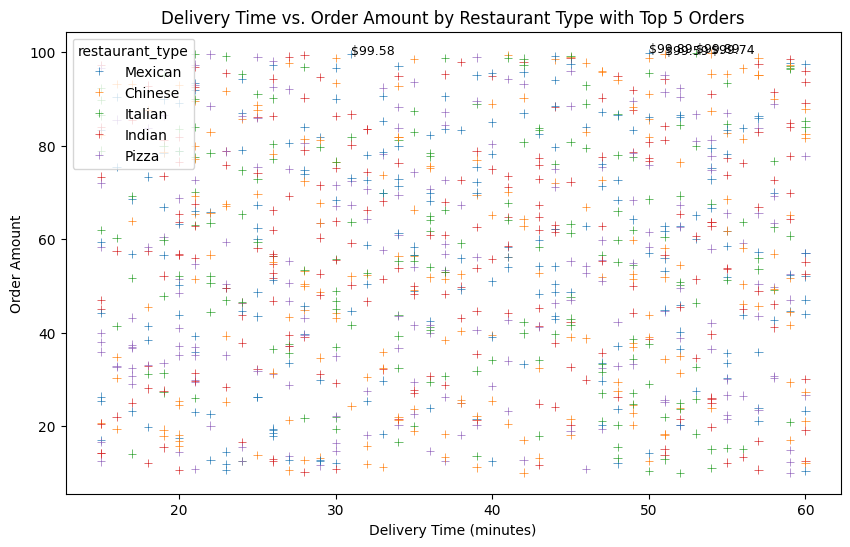

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='delivery_time_min', y='order_amount', hue='restaurant_type', marker='+')
top_5_orders = df.sort_values(by='order_amount', ascending=False).head(5)
for index, row in top_5_orders.iterrows():
    plt.text(row['delivery_time_min'], row['order_amount'], f"${row['order_amount']:.2f}", fontsize=9, ha='left')
plt.title('Delivery Time vs. Order Amount by Restaurant Type with Top 5 Orders')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Order Amount')
plt.show()

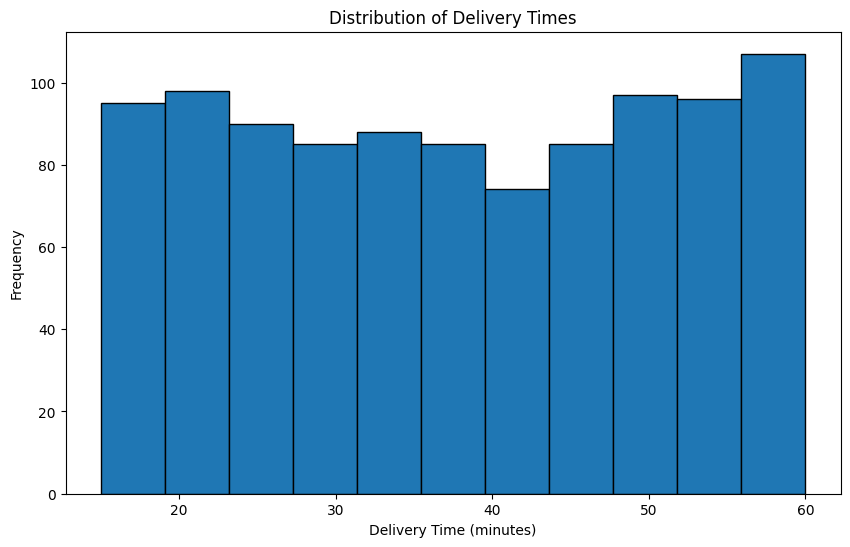

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_time_min'], bins='auto', edgecolor='black')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

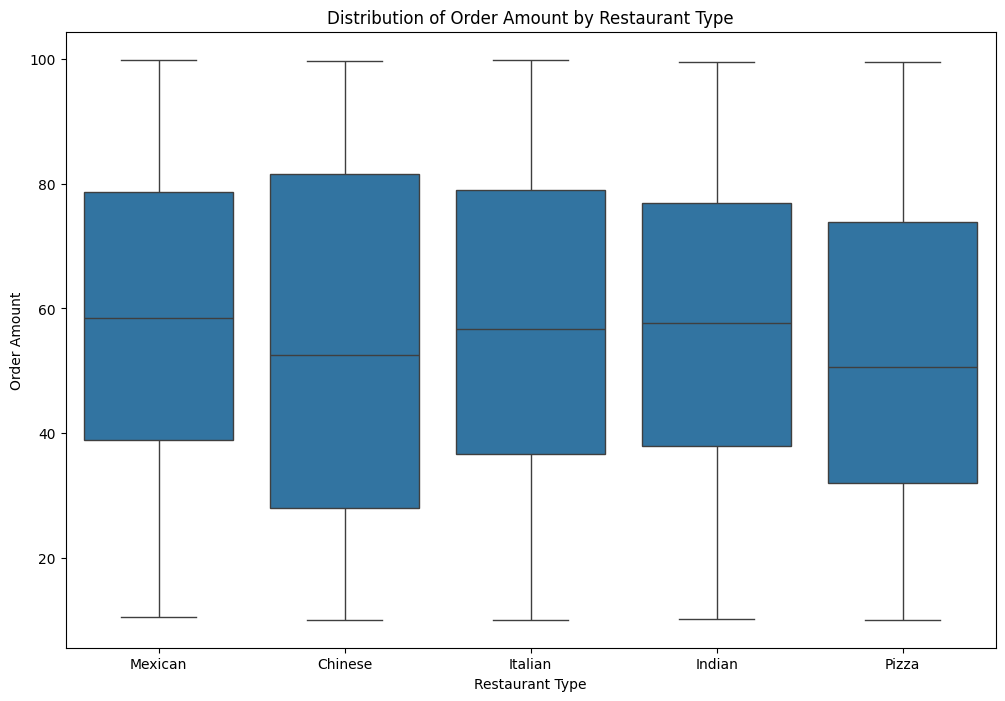

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='restaurant_type', y='order_amount')
plt.title('Distribution of Order Amount by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Order Amount')
plt.show()

In [12]:
condition_or = (df['delivery_time_min'] > 45) | (df['customer_rating'] < 3)
prob_or = condition_or.sum() / len(df)
filtered_df = df[df['order_amount'] > 50] # Corrected filtering condition
condition_and = filtered_df['customer_rating'] == 5
prob_conditional = condition_and.sum() / len(filtered_df) if len(filtered_df) > 0 else 0
print(f"P(Delivery_Time > 45 OR Rating < 3): {prob_or:.4f}")
print(f"P(Rating = 5 | Order_Amount > 50): {prob_conditional:.4f}") # Corrected print statement

P(Delivery_Time > 45 OR Rating < 3): 0.6110
P(Rating = 5 | Order_Amount > 50): 0.2093


In [13]:
from scipy.special import comb, perm
top_rated_orders = df[df['customer_rating'] == 5]
num_top_rated = len(top_rated_orders)
if num_top_rated >= 4:
    combinations_4_from_top = comb(num_top_rated, 4, exact=True)
else:
    combinations_4_from_top = 0
faster_deliveries = df.sort_values(by='delivery_time_min', ascending=True).head(3)
num_faster_deliveries = len(faster_deliveries)
if num_faster_deliveries >= 3:
    permutations_3_from_faster = perm(num_faster_deliveries, 3, exact=True)
else:
    permutations_3_from_faster = 0
print(f"Number of ways to choose 4 top-rated orders for promotion: {combinations_4_from_top}")
print(f"Number of ways to rank 3 faster deliveries: {permutations_3_from_faster}")

Number of ways to choose 4 top-rated orders for promotion: 72867865
Number of ways to rank 3 faster deliveries: 6


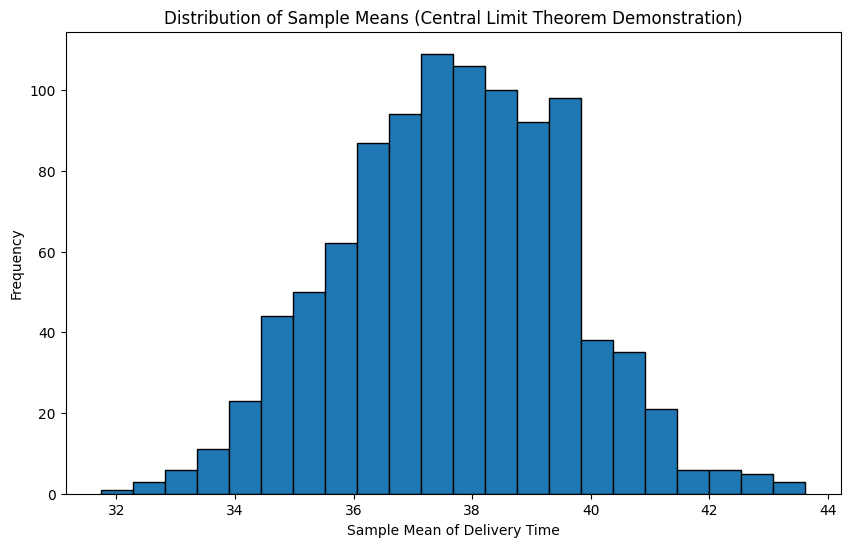

In [14]:
sample_means = []
for _ in range(1000):
    sample = df['delivery_time_min'].sample(50, replace=True) # Use replace=True for sampling with replacement
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins='auto', edgecolor='black')
plt.title('Distribution of Sample Means (Central Limit Theorem Demonstration)')
plt.xlabel('Sample Mean of Delivery Time')
plt.ylabel('Frequency')
plt.show()